<a href="https://colab.research.google.com/github/ibrahimmhammed/All_projects/blob/main/Customer_Analysis_and_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importong Libraries

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#Reading Files

In [22]:
df = pd.read_csv("//content//marketing_campaign.csv",sep="\t")

#Data Exploration

In [23]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [24]:
df.shape

(2240, 29)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [26]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [27]:
df.describe(include="O")

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [28]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

We have only 24 nulls in income, so lets fill them before analysis step

In [29]:
#filling nulls
df['Income'] = df["Income"].fillna(df["Income"].median())

In [30]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Now our df is clean so lets go to analysis

#Data Analysis

Maybe its a good idea if we created a column of (Age) instead of (year birth)

In [35]:
df['Age'] = 2023-df['Year_Birth']

In [36]:
df['Age']

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: Age, Length: 2240, dtype: int64

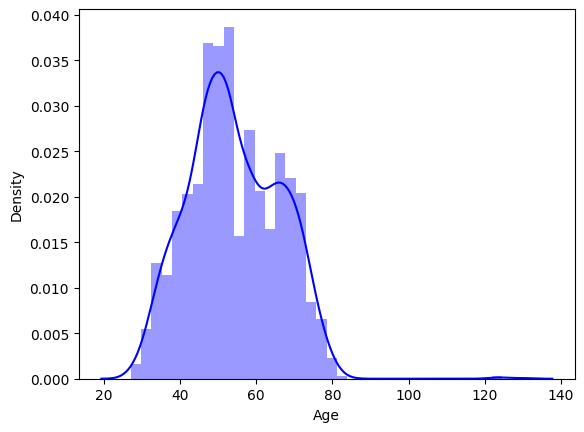

In [38]:
sns.distplot(df['Age'],color='blue')
plt.show()

Lets see Education levels ..

In [39]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

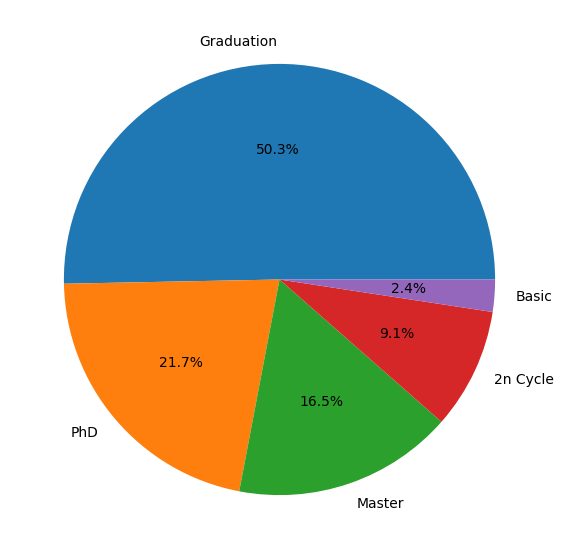

In [41]:
plt.figure(figsize=(7,7))
ed = df['Education'].value_counts()
plt.pie(ed,autopct='%.1f%%',labels=[ed.index[0],ed.index[1],ed.index[2],ed.index[3],ed.index[4]])
plt.show()

What about Martial status ?

In [48]:
ms = df['Marital_Status'].value_counts()
ms

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

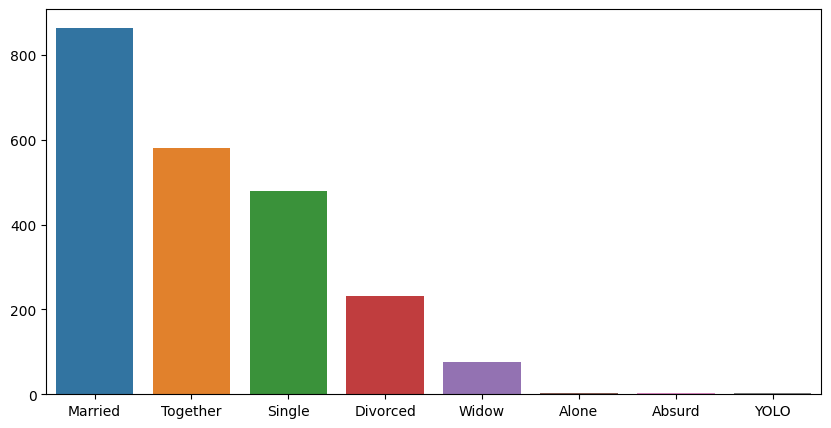

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,
            x=ms.index,
            y=ms.values)
plt.show()

Its very important to see income distribution

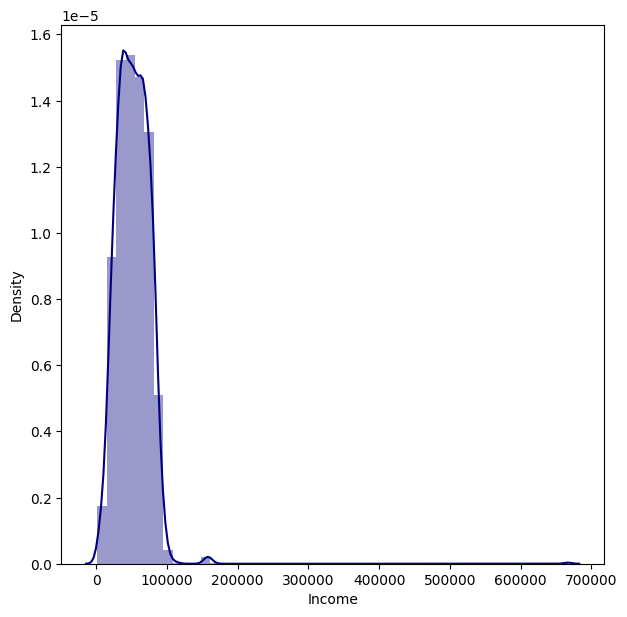

In [52]:
plt.figure(figsize=(7,7))
sns.distplot(df['Income'],color='navy')
plt.show()

Now, we have to see which features have most and least correlation with income

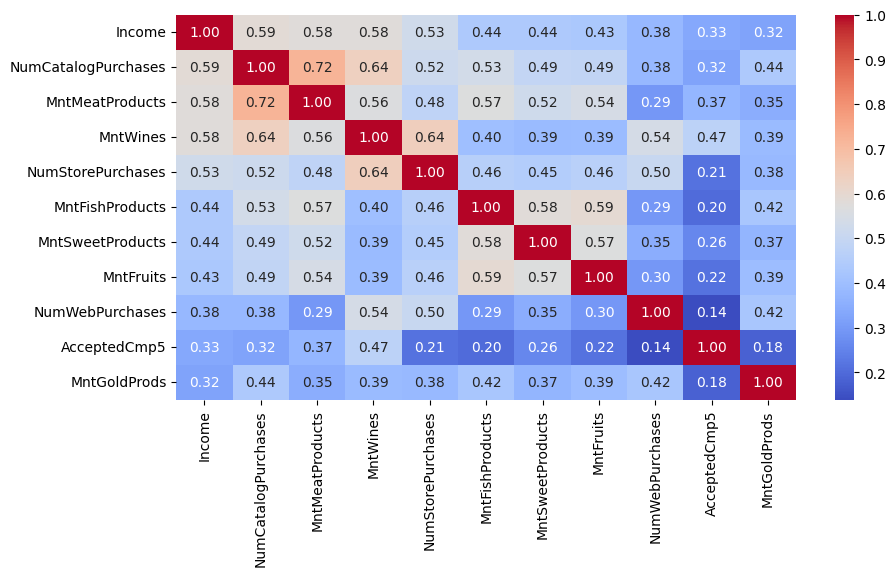

In [61]:
#most correlation
cor = df.corr()

# Select the top 10 features with the highest correlation with "Income"
top_corr_features = cor.nlargest(11, "Income")["Income"].index

# Extract the actual correlation matrix for the top features
top_corr = df[top_corr_features].corr()

# Create a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(top_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

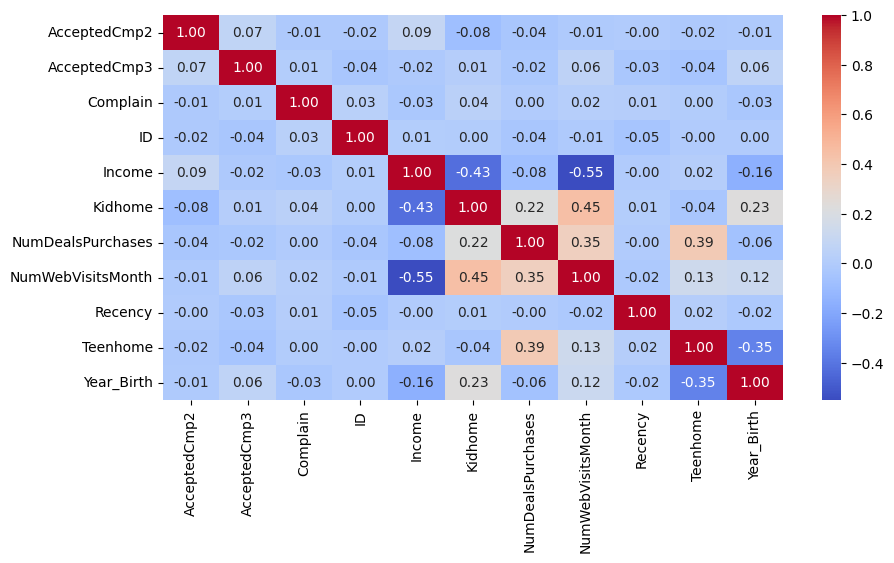

In [63]:
#least correlation
# Select the bottom 10 features with the smallest correlation with "Income"
bottom_corr_features = cor["Income"].nsmallest(10).index

# Include the "Income" column in the selected features
bottom_corr_features = bottom_corr_features.union(["Income"])

# Extract the actual correlation matrix for the bottom features
bottom_corr = df[bottom_corr_features].corr()

# Create a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(bottom_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

We have another important feature (Edication) but its categorical , How to see correlation between it and (Income) ??

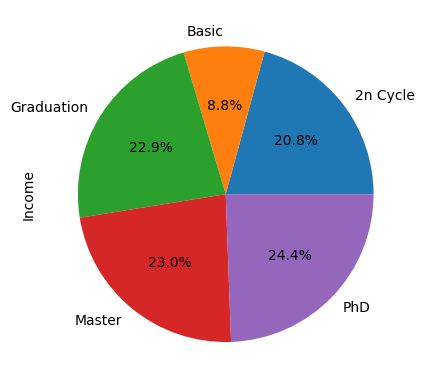

In [68]:
education_income= df.groupby('Education')['Income'].mean()

education_income.plot.pie(autopct='%.1f%%')
plt.show()

#Feature Engineering

Creating extra features like total money spent, family size

In [70]:
df["Total_Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [71]:
df["Relation"] = df["Marital_Status"].replace({"Married": 2, "Together": 2, "Absurd": 1, "Widow": 1, "YOLO": 1, "Divorced": 1, "Single": 1, "Alone": 1})
df["Children"] = df["Kidhome"]+ df["Teenhome"]
df["Family_Size"] = df["Relation"]+ df["Children"]

In [72]:
df= df.drop(['Relation','Children'],axis=1)

In [73]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Spent', 'Family_Size'],
      dtype='object')

In [74]:
df.shape

(2240, 32)

We want to convert (education) type

In [75]:
from sklearn.preprocessing import LabelEncoder


In [76]:
lb = LabelEncoder()
df['Education']= lb.fit_transform(df['Education'])

In [77]:
df.dtypes

ID                       int64
Year_Birth               int64
Education                int64
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
Age                      int64
Total_Spent              int64
Family_Size              int64
dtype: o

In [78]:
df= df.drop(['Marital_Status','Dt_Customer'],axis=1)

Performing cluster

In [79]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

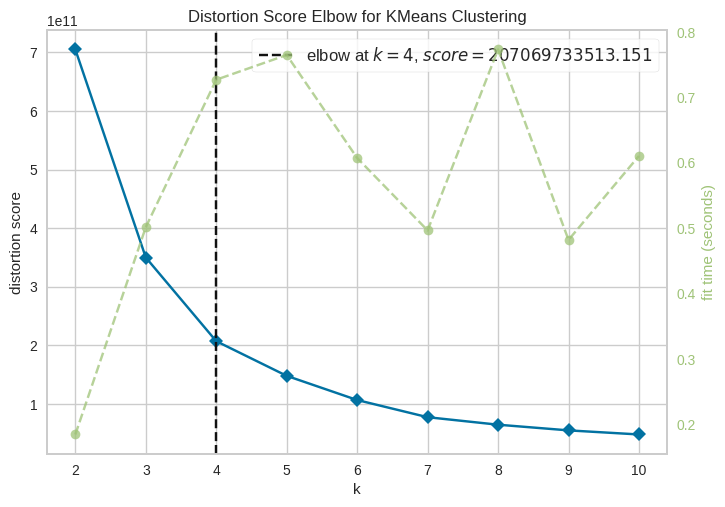

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [80]:
#Elbow method
em = KElbowVisualizer(KMeans(), k=10)
em.fit(df)
em.show()

Best num of clusters (4)

In [81]:
kmc = KMeans(n_clusters=4)
# fit model and predict clusters
pred = kmc.fit_predict(df)
df["Clusters"] = pred

In [88]:
df['Clusters']

0       0
1       0
2       1
3       3
4       0
       ..
2235    0
2236    0
2237    0
2238    1
2239    0
Name: Clusters, Length: 2240, dtype: int32

In [90]:
df['Clusters'].value_counts()
#group 2 is very tiny !!!

0    811
3    740
1    688
2      1
Name: Clusters, dtype: int64

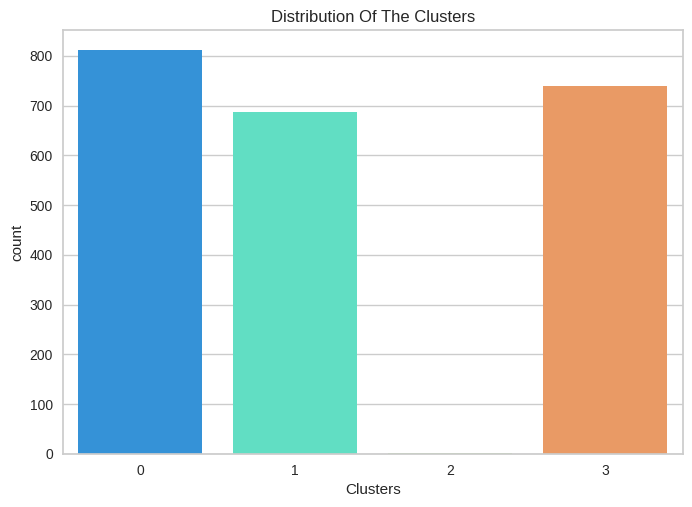

In [89]:
fig = sns.countplot(x=df["Clusters"], palette="rainbow")
fig.set_title("Distribution Of The Clusters")
plt.show()

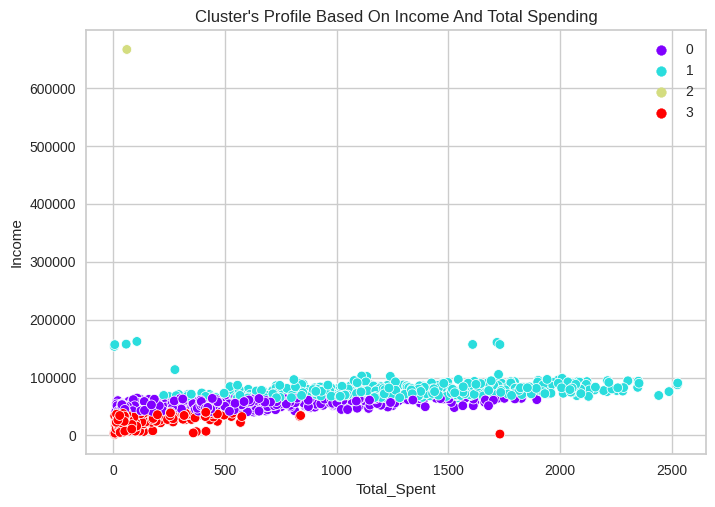

In [91]:
fig = sns.scatterplot(data = df,x=df["Total_Spent"], y=df["Income"],hue=df["Clusters"], palette="rainbow")
fig.set_title("Cluster's Profile Based On Income And Total Spending")
plt.legend()
plt.show()